My data source is a csv of data breaches that have happened. It lists what kind of breach it was, how many records were compromised, who was breached, when it happened, how it happened, and the type of organization affected.
Link: https://www.kaggle.com/datasets/thedevastator/data-breaches-a-comprehensive-list

Inquiry question: What are the common ways data breaches occur and how could they be avoided? 

Sub: What was the most popular method used to breach?
Sub: What industry is breached the most? 
Sub: Are there any entities frequently targeted?

Data Cleaning:

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv('breach.csv')

# Remove Unwanted Columns
print("Shape:", df.shape)
remove = ['Unnamed: 0','Sources',]
df.drop(remove, inplace=True, axis=1)
print(df.columns)

# Checking Missing Values
missing = df.isnull().sum()
print('Missing data:')
print(missing)

# Removing Missing Values
df2 = df.dropna()
print(df2.isnull().sum())


Shape: (352, 7)
Index(['Entity', 'Year', 'Records', 'Organization type', 'Method'], dtype='object')
Missing data:
Entity               0
Year                 0
Records              2
Organization type    0
Method               1
dtype: int64
Entity               0
Year                 0
Records              0
Organization type    0
Method               0
dtype: int64


In [3]:
# No Duplicates
print(df2.shape)
df2 = df2.drop_duplicates()
print(df2.shape)

(349, 5)
(349, 5)


In [4]:
# Valid Data Types
unique_years = df2['Year'].unique()
print(unique_years)
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce', downcast='integer')
df2.dropna(subset=['Year'], inplace=True)
df2['Records'] = pd.to_numeric(df2['Records'], errors='coerce', downcast='integer')


print(df2.dtypes)



['2016' '2020' '2013' '2019' '2017' '2018' '2005' '2021' '2015' '2004'
 '2006' '2014' '2008' '2010' '2009' '2012' '2011' '2007' '2019-2020'
 '2018-2019' '2014 and 2015' '2022']
Entity                object
Year                 float64
Records              float64
Organization type     object
Method                object
dtype: object


In [5]:
# Categorical Col
categorical_columns = ["Entity", "Organization type", "Method"]

for column in categorical_columns:
    unique_values = df2[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)

Unique values for Entity:
['21st Century Oncology' '500px' 'Accendo Insurance Co.'
 'Adobe Systems Incorporated' 'Adobe Inc.' 'Advocate Medical Group'
 'AerServ (subsidiary of InMobi)' 'Affinity Health Plan, Inc.' 'Airtel'
 'Air Canada' 'Amazon Japan G.K.' 'TD Ameritrade' 'Ancestry.com'
 'Animal Jam' 'Ankle & Foot Center of Tampa Bay, Inc.' 'Anthem Inc.' 'AOL'
 'Apple, Inc./BlueToad' 'Apple' 'Apple Health Medicaid' 'Ashley Madison'
 'AT&T' 'Atraf' 'Auction.co.kr' 'Australian Immigration Department'
 'Australian National University' 'Automatic Data Processing'
 'AvMed, Inc.' "Bailey's Inc." 'The Bank of New York Mellon'
 'Bank of America' 'Barnes & Noble' 'Bell Canada' 'Benesse' 'Betfair'
 'Bethesda Game Studios' 'Betsson Group' 'Blank Media Games'
 'Blizzard Entertainment' 'BlueCross BlueShield of Tennessee'
 'BMO and Simplii' '2018 British Airways cyberattack' 'British Airways'
 '2019 Bulgarian revenue agency hack'
 'California Department of Child Support Services' 'Canva' 'Capcom'
 '

In [6]:
print(df2.head(10))

                           Entity    Year      Records   Organization type  \
0           21st Century Oncology  2016.0    2200000.0          healthcare   
1                           500px  2020.0   14870304.0   social networking   
2           Accendo Insurance Co.  2020.0     175350.0          healthcare   
3      Adobe Systems Incorporated  2013.0  152000000.0                tech   
4                      Adobe Inc.  2019.0    7500000.0                tech   
5          Advocate Medical Group  2017.0    4000000.0          healthcare   
6  AerServ (subsidiary of InMobi)  2018.0      75000.0         advertising   
7      Affinity Health Plan, Inc.  2013.0     344579.0          healthcare   
8                          Airtel  2019.0  320000000.0  telecommunications   
9                      Air Canada  2018.0      20000.0           transport   

                Method  
0               hacked  
1               hacked  
2        poor security  
3               hacked  
4        poor se

In [7]:
# Numermerical plus outliers
# Add Record
unique_values = df2["Year"].unique()
print(unique_values)


[2016. 2020. 2013. 2019. 2017. 2018. 2005. 2021. 2015. 2004. 2006. 2014.
 2008. 2010. 2009. 2012. 2011. 2007. 2022.]


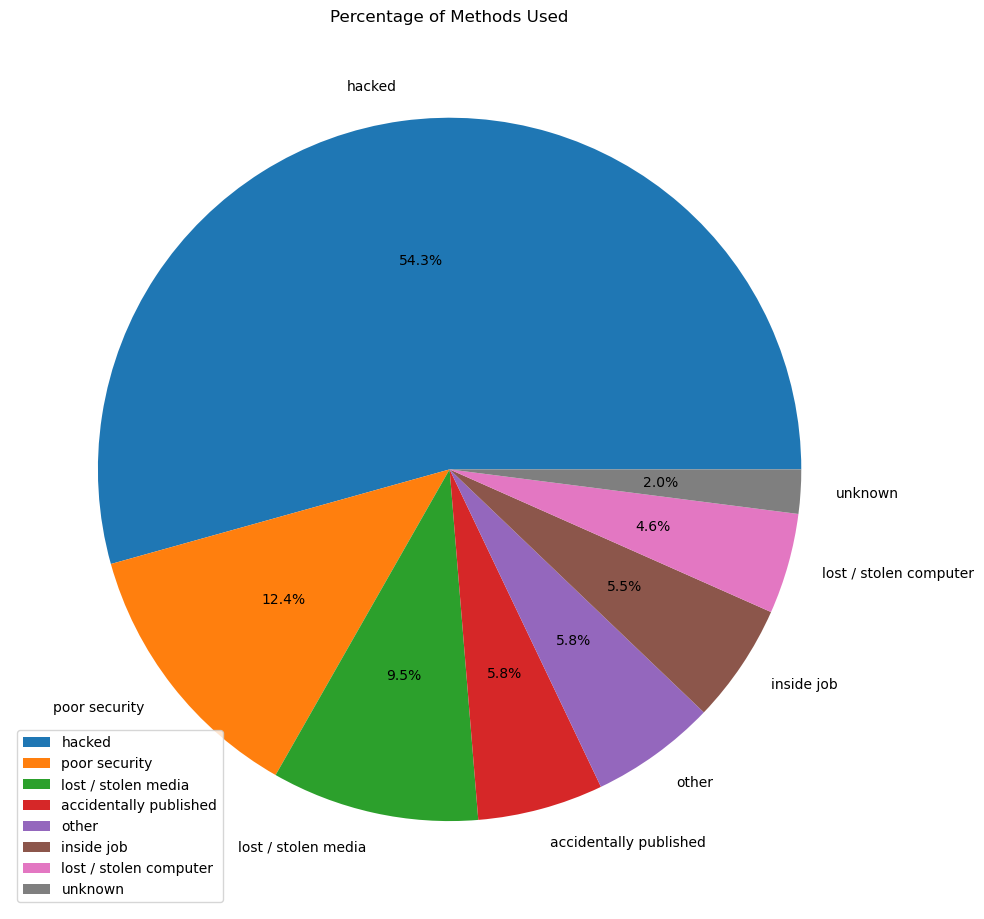

In [10]:
#Pie chart for Qa

method_counts = df2['Method'].value_counts()

other_threshold = 1  

below_thres = method_counts[method_counts / method_counts.sum() * 100 < other_threshold]
df2['Method'].replace(below_thres.index, 'other', inplace=True)

plt

plt.figure(figsize=(10, 10))
plt.pie(method_counts,
    labels=method_counts.index, 
    autopct='%.1f%%')
plt.title('Percentage of Methods Used')
plt.tight_layout()
plt.legend()
plt.show()

This pie chart explains the percentages of methods used to cause the data breaches. The majority (54.3%) of breaches were actually hacked and infiltrated, while 12.4% were just due to poor security. The 'other' slice is composed of various smaller percentages (less than zero) that add up to 5.8%.

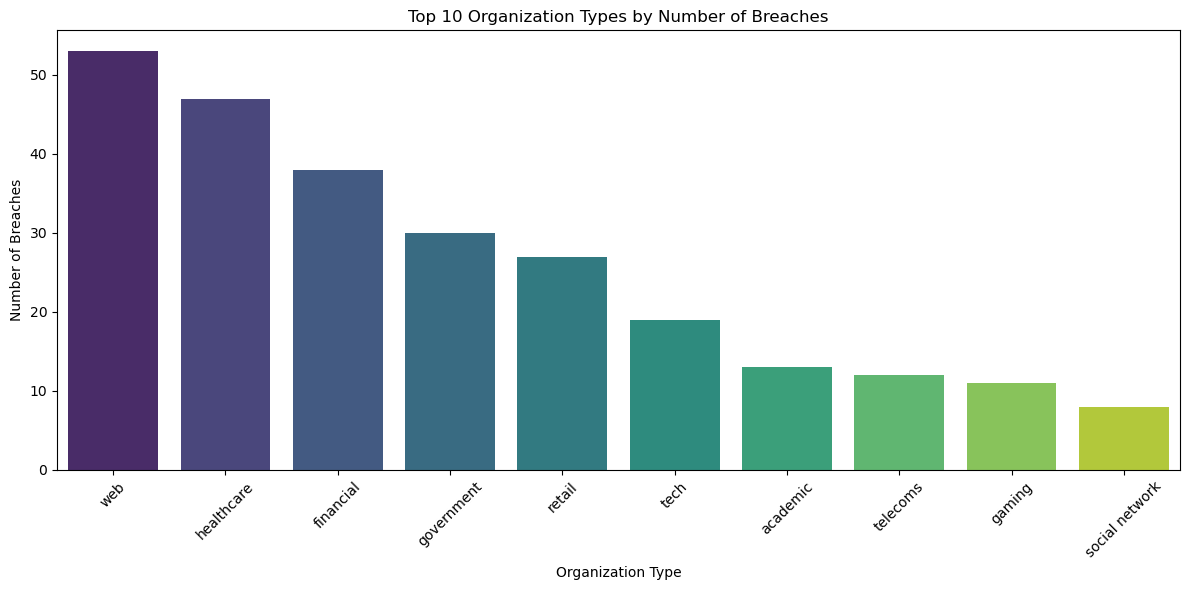

In [9]:
#Bar plot for Qb
import seaborn as sns

organization_type_counts = df2['Organization type'].value_counts()

top_10_organization_types = organization_type_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_organization_types.index, y=top_10_organization_types.values, palette='viridis')
plt.xlabel("Organization Type")
plt.ylabel("Number of Breaches")
plt.title("Top 10 Organization Types by Number of Breaches")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This graph explains the top ten industries that are most targeted by data breaches. This answerers sub question two by not only listing the mosts targeted, but also gives several others. This shows that threat actors target industries that have the most possible profit. The web industry is most targeted primarily due to the fact that it is easier to exploit than physical locations. Healthcare and financial industries are very profitable and tend to hold more information so they are also frequently targeted. Government organizations are often mainly targeted nation-state/sponsored hackers.

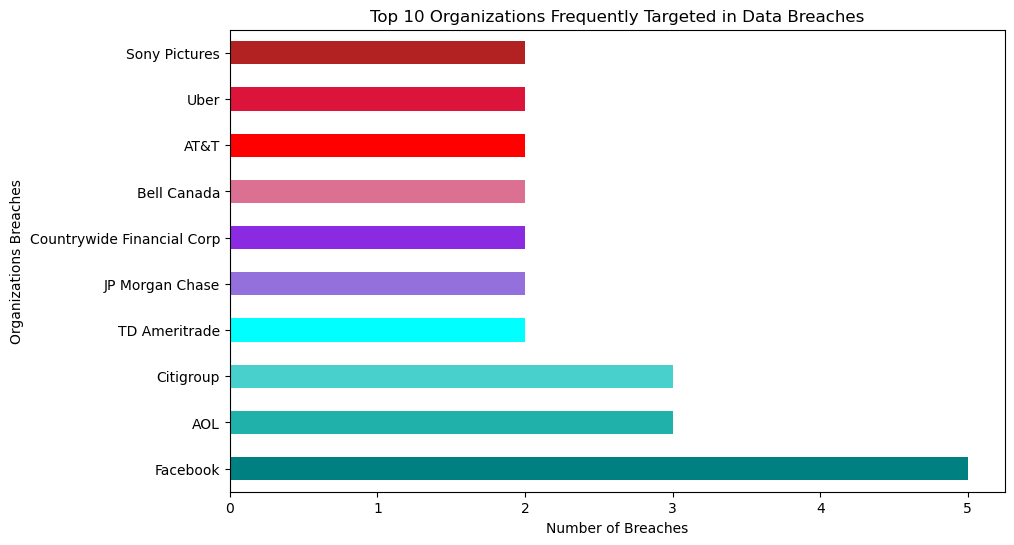

In [52]:
# Horizontal Bar Plot for Qc
entity_counts = df2['Entity'].value_counts()

top_entities = entity_counts.head(10)
colors = 'teal', 'lightseagreen', 'mediumturquoise', 'aqua', 'mediumpurple', 'blueviolet', 'palevioletred', 'red', 'crimson', 'firebrick'
plt.figure(figsize=(10, 6))
top_entities.plot(kind='barh', color=colors)
plt.xlabel("Number of Breaches")
plt.ylabel("Organizations Breaches")
plt.title(f"Top 10 Organizations Frequently Targeted in Data Breaches")
plt.show()

Given the information on the graph above, not many entities are targeted more than twice. There is a very obvious outlier here due to Facebook being one of the most controversial and popular social media websites. Considering other social media sites aren't in the top ten, it is safe to believe facebook is targeted due to the mass amount of data collected mixed with the large amount of site traffic. Facebook is not only a social networking site, but it has a marketplace, games, pages, a payment system, and more features.

Summary:

It's important to recognize that there is no foolproof system that is entirely impervious to breaches. Preventing data breaches requires a combination of advanced cybersecurity measures, industry-specific precautions, and a smart approach to entities with substantial data assets. By addressing these issues, organizations can significantly diminish the risk of data breaches and shield sensitive information from unauthorized access.

To reduce the risk of data breaches, organizations should focus on strengthening their cybersecurity measures. The most popular method used to breach data was hacking with a percentage of 54.3%. Therefore, implementing robust security protocols, regular system audits, and educating employees about cybersecurity best practices can help prevent such breaches. Social Engineering is the primary cause of data breach hacks. Also, addressing poor security practices within the organization is crucial, emphasizing the importance of strong passwords, access control, and encryption. 

Industries should plan ahead for potential security breaches and expect the worst-case scenarios to safeguard their data, particularly those that are frequently targeted. The susceptibility of the web industry to breaches is primarily attributed to its digital nature, which makes it more vulnerable to be explited. However, all sectors, especially healthcare and finance, should prioritize cybersecurity because they are prime targets due to the valuable assets they possess. Government organizations must also stay vigilant as they are also targeted by nation-state hackers.

While only a limited number of entities experience multiple breaches, it is essential to identify potential outliers. In the case of Facebook, its widespread popularity and extensive data collection make it prime target. To help prevent breaches, organizations with extensive data holdings, diverse functions, and high user engagement, such as Facebook, should strengthen their infrastructure and monitoring systems. Conducting regular security assessments and audits is vital for identifying vulnerabilities in such intricate platforms.

This dataset was very informative, however, I would have liked to have a few more informative columns to go along with what is already here. As you can see above, there are only 5 useful columns. Columns that provide information such as, party responsible for the breach, impact on victims, and type of data compromised would be great additions to this dataset. This would also help data cleaning as it would help keep columns data type specific, aiding numerical and categorical variables.

My data source is a csv of data breaches that have happened. It lists what kind of breach it was, how many records were compromised, who was breached, when it happened, how it happened, and the type of organization affected.
Link: https://www.kaggle.com/datasets/thedevastator/data-breaches-a-comprehensive-list

Inquiry question: What are the common ways data breaches occur and how could they be avoided? 

Sub: What was the most popular method used to breach?
Sub: What industry is breached the most? 
Sub: Are there any entities frequently targeted?

Data Cleaning:

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv('breach.csv')

# Remove Unwanted Columns
print("Shape:", df.shape)
remove = ['Unnamed: 0','Sources',]
df.drop(remove, inplace=True, axis=1)
print(df.columns)

# Checking Missing Values
missing = df.isnull().sum()
print('Missing data:')
print(missing)

# Removing Missing Values
df2 = df.dropna()
print(df2.isnull().sum())


Shape: (352, 7)
Index(['Entity', 'Year', 'Records', 'Organization type', 'Method'], dtype='object')
Missing data:
Entity               0
Year                 0
Records              2
Organization type    0
Method               1
dtype: int64
Entity               0
Year                 0
Records              0
Organization type    0
Method               0
dtype: int64


In [65]:
# No Duplicates
print(df2.shape)
df2 = df2.drop_duplicates()
print(df2.shape)

(349, 5)
(349, 5)


In [66]:
# Valid Data Types
unique_years = df2['Year'].unique()
print(unique_years)
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce', downcast='integer')
df2.dropna(subset=['Year'], inplace=True)
df2['Records'] = pd.to_numeric(df2['Records'], errors='coerce', downcast='integer')


print(df2.dtypes)



['2016' '2020' '2013' '2019' '2017' '2018' '2005' '2021' '2015' '2004'
 '2006' '2014' '2008' '2010' '2009' '2012' '2011' '2007' '2019-2020'
 '2018-2019' '2014 and 2015' '2022']
Entity                object
Year                 float64
Records              float64
Organization type     object
Method                object
dtype: object


In [67]:
# Categorical Col
categorical_columns = ["Entity", "Organization type", "Method"]

for column in categorical_columns:
    unique_values = df2[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)

Unique values for Entity:
['21st Century Oncology' '500px' 'Accendo Insurance Co.'
 'Adobe Systems Incorporated' 'Adobe Inc.' 'Advocate Medical Group'
 'AerServ (subsidiary of InMobi)' 'Affinity Health Plan, Inc.' 'Airtel'
 'Air Canada' 'Amazon Japan G.K.' 'TD Ameritrade' 'Ancestry.com'
 'Animal Jam' 'Ankle & Foot Center of Tampa Bay, Inc.' 'Anthem Inc.' 'AOL'
 'Apple, Inc./BlueToad' 'Apple' 'Apple Health Medicaid' 'Ashley Madison'
 'AT&T' 'Atraf' 'Auction.co.kr' 'Australian Immigration Department'
 'Australian National University' 'Automatic Data Processing'
 'AvMed, Inc.' "Bailey's Inc." 'The Bank of New York Mellon'
 'Bank of America' 'Barnes & Noble' 'Bell Canada' 'Benesse' 'Betfair'
 'Bethesda Game Studios' 'Betsson Group' 'Blank Media Games'
 'Blizzard Entertainment' 'BlueCross BlueShield of Tennessee'
 'BMO and Simplii' '2018 British Airways cyberattack' 'British Airways'
 '2019 Bulgarian revenue agency hack'
 'California Department of Child Support Services' 'Canva' 'Capcom'
 '

In [68]:
print(df2.head(10))

                           Entity    Year      Records   Organization type  \
0           21st Century Oncology  2016.0    2200000.0          healthcare   
1                           500px  2020.0   14870304.0   social networking   
2           Accendo Insurance Co.  2020.0     175350.0          healthcare   
3      Adobe Systems Incorporated  2013.0  152000000.0                tech   
4                      Adobe Inc.  2019.0    7500000.0                tech   
5          Advocate Medical Group  2017.0    4000000.0          healthcare   
6  AerServ (subsidiary of InMobi)  2018.0      75000.0         advertising   
7      Affinity Health Plan, Inc.  2013.0     344579.0          healthcare   
8                          Airtel  2019.0  320000000.0  telecommunications   
9                      Air Canada  2018.0      20000.0           transport   

                Method  
0               hacked  
1               hacked  
2        poor security  
3               hacked  
4        poor se

In [69]:
# Numermerical plus outliers
# Add Record
unique_values = df2["Year"].unique()
print(unique_values)


[2016. 2020. 2013. 2019. 2017. 2018. 2005. 2021. 2015. 2004. 2006. 2014.
 2008. 2010. 2009. 2012. 2011. 2007. 2022.]


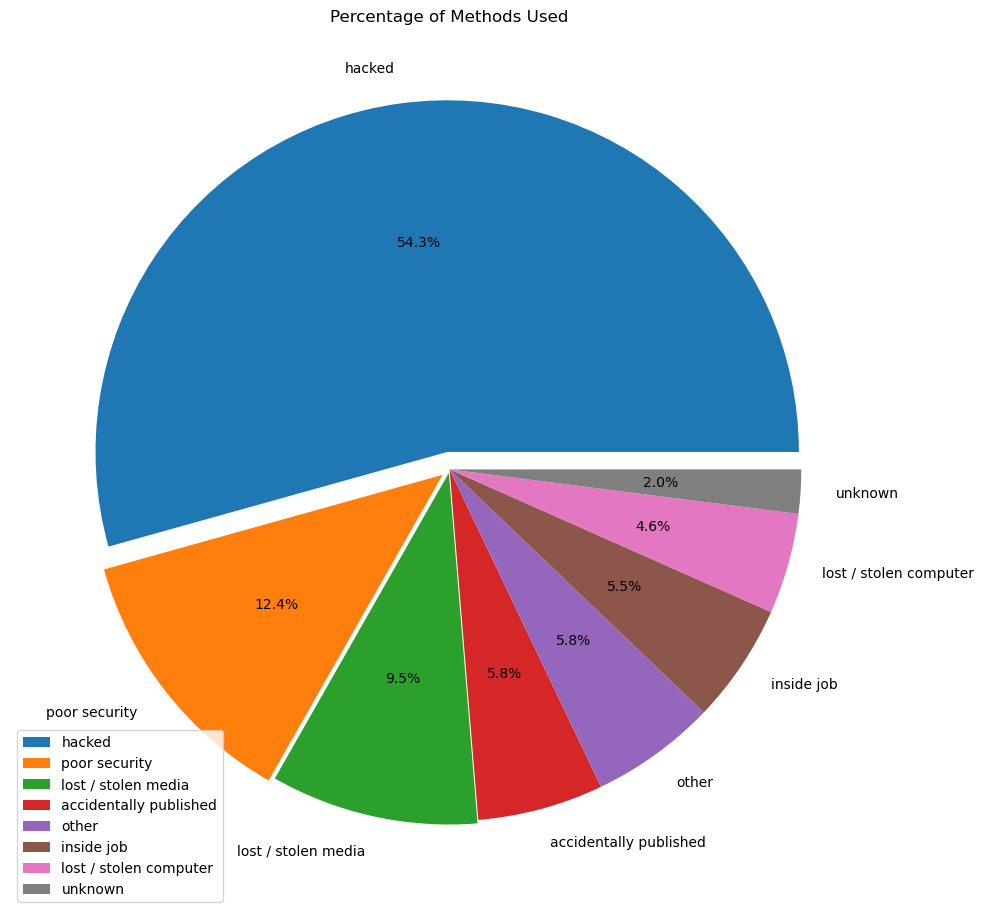

In [72]:
#Pie chart for Qa

method_counts = df2['Method'].value_counts()

other_threshold = 1  

below_thres = method_counts[method_counts / method_counts.sum() * 100 < other_threshold]
df2['Method'].replace(below_thres.index, 'other', inplace=True)

plt

plt.figure(figsize=(10, 10))
plt.pie(method_counts,
    explode=[0.05,0.025,0.01,0,0,0,0,0,0],
    labels=method_counts.index, 
    autopct='%.1f%%')
plt.title('Percentage of Methods Used')
plt.tight_layout()
plt.legend()
plt.show()

This pie chart explains the percentages of methods used to cause the data breaches. The majority (54.3%) of breaches were actually hacked and infiltrated, while 12.4% were just due to poor security. The 'other' slice is composed of various smaller percentages (less than zero) that add up to 5.8%.

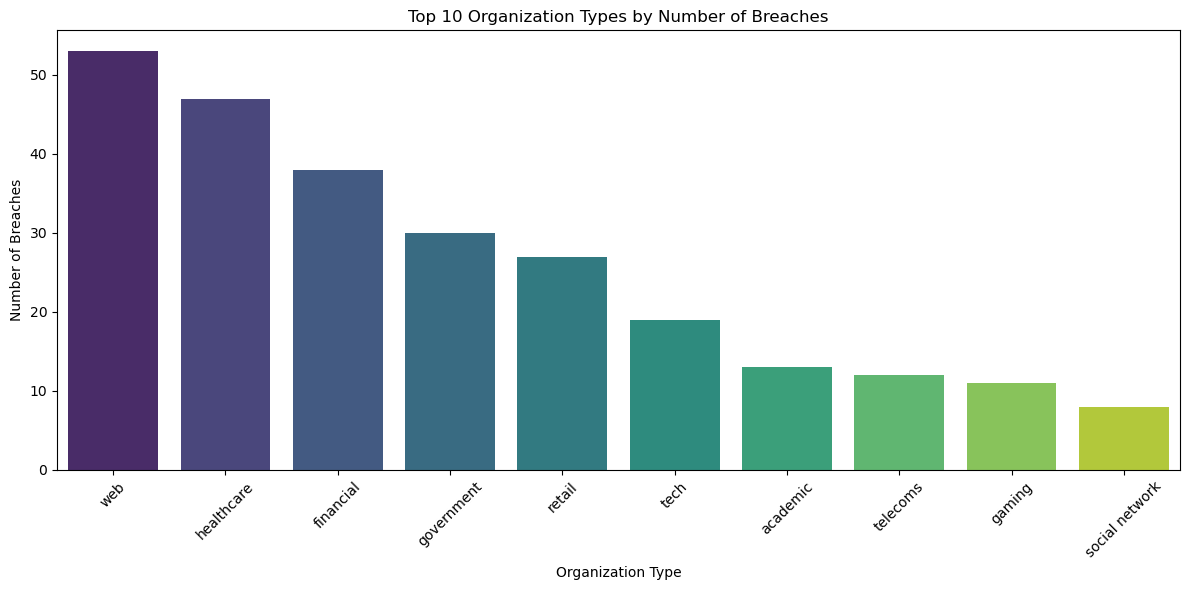

In [60]:
#Bar plot for Qb
import seaborn as sns

organization_type_counts = df2['Organization type'].value_counts()

top_10_organization_types = organization_type_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_organization_types.index, y=top_10_organization_types.values, palette='viridis')
plt.xlabel("Organization Type")
plt.ylabel("Number of Breaches")
plt.title("Top 10 Organization Types by Number of Breaches")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

This graph explains the top ten industries that are most targeted by data breaches. This answerers sub question two by not only listing the mosts targeted, but also gives several others. This shows that threat actors target industries that have the most possible profit. The web industry is most targeted primarily due to the fact that it is easier to exploit than physical locations. Healthcare and financial industries are very profitable and tend to hold more information so they are also frequently targeted. Government organizations are often mainly targeted nation-state/sponsored hackers.

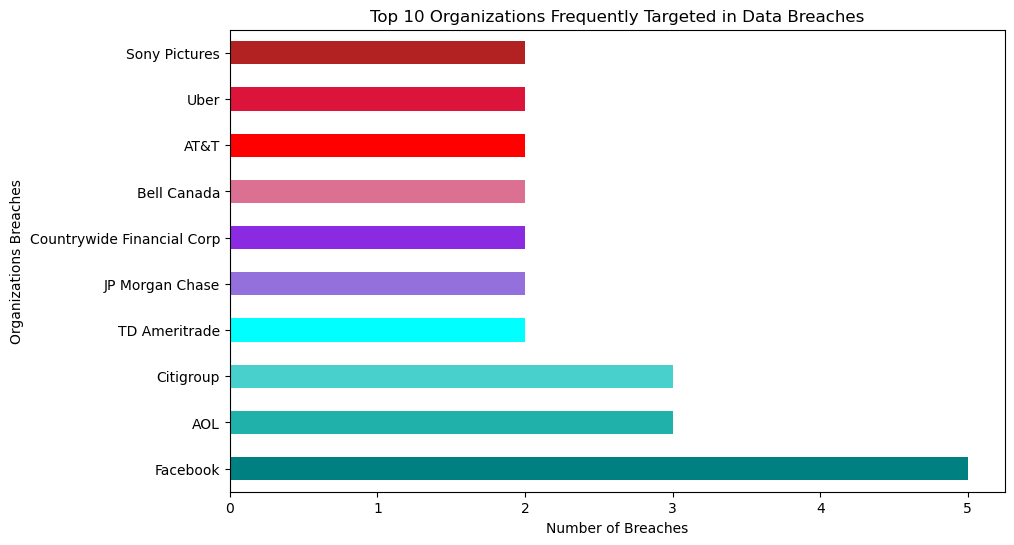

In [52]:
# Horizontal Bar Plot for Qc
entity_counts = df2['Entity'].value_counts()

top_entities = entity_counts.head(10)
colors = 'teal', 'lightseagreen', 'mediumturquoise', 'aqua', 'mediumpurple', 'blueviolet', 'palevioletred', 'red', 'crimson', 'firebrick'
plt.figure(figsize=(10, 6))
top_entities.plot(kind='barh', color=colors)
plt.xlabel("Number of Breaches")
plt.ylabel("Organizations Breaches")
plt.title(f"Top 10 Organizations Frequently Targeted in Data Breaches")
plt.show()

Given the information on the graph above, not many entities are targeted more than twice. There is a very obvious outlier here due to Facebook being one of the most controversial and popular social media websites. Considering other social media sites aren't in the top ten, it is safe to believe facebook is targeted due to the mass amount of data collected mixed with the large amount of site traffic. Facebook is not only a social networking site, but it has a marketplace, games, pages, a payment system, and more features.

Summary:

It's important to recognize that there is no foolproof system that is entirely impervious to breaches. Preventing data breaches requires a combination of advanced cybersecurity measures, industry-specific precautions, and a smart approach to entities with substantial data assets. By addressing these issues, organizations can significantly diminish the risk of data breaches and shield sensitive information from unauthorized access.

To reduce the risk of data breaches, organizations should focus on strengthening their cybersecurity measures. The most popular method used to breach data was hacking with a percentage of 54.3%. Therefore, implementing robust security protocols, regular system audits, and educating employees about cybersecurity best practices can help prevent such breaches. Social Engineering is the primary cause of data breach hacks. Also, addressing poor security practices within the organization is crucial, emphasizing the importance of strong passwords, access control, and encryption. 

Industries should plan ahead for potential security breaches and expect the worst-case scenarios to safeguard their data, particularly those that are frequently targeted. The susceptibility of the web industry to breaches is primarily attributed to its digital nature, which makes it more vulnerable to be explited. However, all sectors, especially healthcare and finance, should prioritize cybersecurity because they are prime targets due to the valuable assets they possess. Government organizations must also stay vigilant as they are also targeted by nation-state hackers.

While only a limited number of entities experience multiple breaches, it is essential to identify potential outliers. In the case of Facebook, its widespread popularity and extensive data collection make it prime target. To help prevent breaches, organizations with extensive data holdings, diverse functions, and high user engagement, such as Facebook, should strengthen their infrastructure and monitoring systems. Conducting regular security assessments and audits is vital for identifying vulnerabilities in such intricate platforms.

This dataset was very informative, however, I would have liked to have a few more informative columns to go along with what is already here. As you can see above, there are only 5 useful columns. Columns that provide information such as, party responsible for the breach, impact on victims, and type of data compromised would be great additions to this dataset. This would also help data cleaning as it would help keep columns data type specific, aiding numerical and categorical variables.